In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scapy.all import sniff, rdpcap

In [2]:
# Capturamos 25 paquetes de la red local
packets = sniff(count=25)

In [3]:
# Imprimimos el tipo de variable
print(type(packets))
# Imprimimos la longitud de la variable
print(len(packets))
# Imprimimos el resumen de los paquetes capturados
print(packets.summary())

<class 'scapy.plist.PacketList'>
25
Ether / IPv6 / ICMPv6ND_NS / ICMPv6 Neighbor Discovery Option - Source Link-Layer Address 9a:66:20:30:25:c9
Ether / IP / TCP 13.70.79.200:https > 192.168.5.158:59552 A
Ether / IP / TCP 13.70.79.200:https > 192.168.5.158:59553 A
Ether / IP / TCP 142.250.177.10:https > 192.168.5.158:59275 PA / Raw
Ether / IP / TCP 192.168.5.158:59275 > 142.250.177.10:https A
Ether / IP / TCP 192.168.5.158:59275 > 142.250.177.10:https PA / Raw
Ether / IP / TCP 142.250.177.10:https > 192.168.5.158:59275 PA / Raw
Ether / IP / TCP 192.168.5.158:59275 > 142.250.177.10:https A
Ether / IP / UDP 17.253.13.89:https > 192.168.5.158:64795 / Raw
Ether / IP / UDP 17.253.13.89:https > 192.168.5.158:64795 / Raw
Ether / IP / ICMP 192.168.5.158 > 17.253.13.89 dest-unreach port-unreachable / IPerror / UDPerror
Ether / IP / ICMP 192.168.5.158 > 17.253.13.89 dest-unreach port-unreachable / IPerror / UDPerror
Ether / 192.168.5.1 > 224.0.0.1 igmp / Raw
Ether / IPv6 / TCP fe80::1c74:e931:4c2

In [4]:
# Imprimimos el tipo de dato del primer paquete capturado
print(type(packets[0]))

<class 'scapy.layers.l2.Ether'>


## Análisis Estadístico

In [5]:
# Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.
paquetes = rdpcap("analisis_paquetes.pcap")

In [6]:
# Convierta la variable a un DataFrame.

data = []

for i, pkt in enumerate(paquetes):
    print(pkt)

    packet_info = {
        'packet_id': i,
        'time': float(pkt.time),
        'size': len(pkt),
        'summary': pkt.summary()
    }
    
    # Add IP layer info if present
    if 'IP' in pkt:
        packet_info.update({
            'src_ip': pkt['IP'].src,
            'dst_ip': pkt['IP'].dst,
            'proto': pkt['IP'].proto
        })

    
    # Add TCP/UDP info if present
    if 'TCP' in pkt:
        packet_info.update({
            'src_port': pkt['TCP'].sport,
            'dst_port': pkt['TCP'].dport,
            'transport': 'TCP'
        })
    elif 'UDP' in pkt:
        packet_info.update({
            'src_port': pkt['UDP'].sport,
            'dst_port': pkt['UDP'].dport,
            'transport': 'UDP'
        })

    if 'Raw' in pkt:
        packet_info.update({
            'payload': pkt['Raw'].load
        })
    
    data.append(packet_info)

df_paquetes = pd.DataFrame(data)

Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e
Ether / IP / UDP / DNS Qry b'google.com.' / Raw
Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807::200e


In [7]:
# Muestre el contenido de las primeras 5 filas del dataset.
df_paquetes.head()

,packet_id,time,size,summary,src_ip,dst_ip,proto,src_port,dst_port,transport,payload
0,0,1.532199e+09,975,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\...
1,1,1.532199e+09,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,84.54.22.33,10.1.10.53,17,53,53,UDP,NaN
2,2,1.532199e+09,989,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b':\xef\xbf\xbdle:\xc7\xa9\xef\xbf\xbd\xef\xbf...
3,3,1.532199e+09,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,84.54.22.33,10.1.10.53,17,53,53,UDP,NaN
4,4,1.532199e+09,1026,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbd\xef\xbf\xbd^n\xef\xbf\xbd\'\'\x...


In [8]:
# Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.
df_paquetes[['src_ip', 'dst_ip', 'src_port', 'dst_port']]

,src_ip,dst_ip,src_port,dst_port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53
...,...,...,...,...
57,84.54.22.33,10.1.10.53,53,53
58,10.1.10.53,84.54.22.33,53,53
59,84.54.22.33,10.1.10.53,53,53
60,10.1.10.53,84.54.22.33,53,53


### Inciso 5

In [9]:
# a. Muestre todas las IP origen
df_paquetes['src_ip'].unique()

array(['10.1.10.53', '84.54.22.33', '75.75.75.75'], dtype=object)

In [10]:
# b. Muestre todas las IP destino
df_paquetes['dst_ip'].unique()

array(['84.54.22.33', '10.1.10.53', '75.75.75.75'], dtype=object)

In [11]:
# c. ¿Cuál es la IP origen más frecuente?
most_origin_ip = df_paquetes['src_ip'].value_counts().idxmax()
most_origin_ip

'10.1.10.53'

In [12]:
# i. ¿A qué IP destino se comunica con más frecuencia?
most_frequent_dst_ip = df_paquetes[df_paquetes['src_ip'] == most_origin_ip]['dst_ip'].value_counts().idxmax()
most_frequent_dst_ip

'84.54.22.33'

In [13]:
# ii. ¿A que puerto destino se comunica?
most_frequent_dst_port = df_paquetes[df_paquetes['src_ip'] == most_origin_ip]['dst_port'].value_counts().idxmax()
print(most_frequent_dst_port)

# ¿Cuál es el propósito de este puerto?
"""
El puerto 53 es utilizado por el protocolo DNS (Domain Name System), que se utiliza para la resolución de nombres de dominio a direcciones IP.
"""

53


'\nEl puerto 53 es utilizado por el protocolo DNS (Domain Name System), que se utiliza para la resolución de nombres de dominio a direcciones IP.\n'

In [14]:
# iii. ¿Desde que puertos origen se comunica?
df_paquetes[df_paquetes['src_ip'] == most_origin_ip]['src_port'].value_counts().idxmax()

53

### Inciso 6

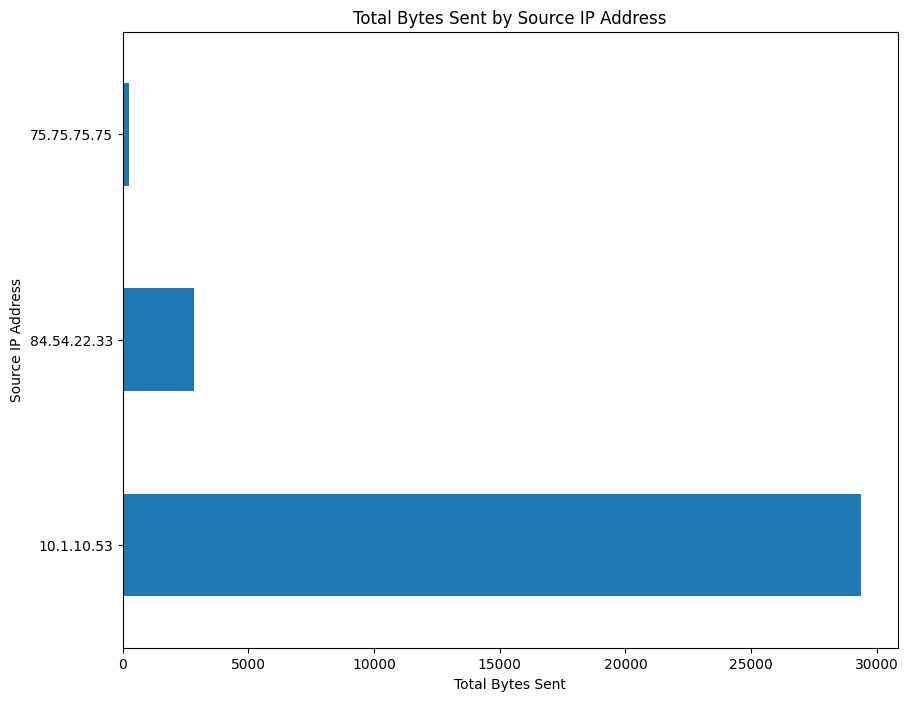

In [15]:
# a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la suma de los payloads (bytes) enviados desde dichas direcciones.
df_paquetes.groupby('src_ip')['size'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.xlabel('Total Bytes Sent')
plt.ylabel('Source IP Address')
plt.title('Total Bytes Sent by Source IP Address')
plt.show()

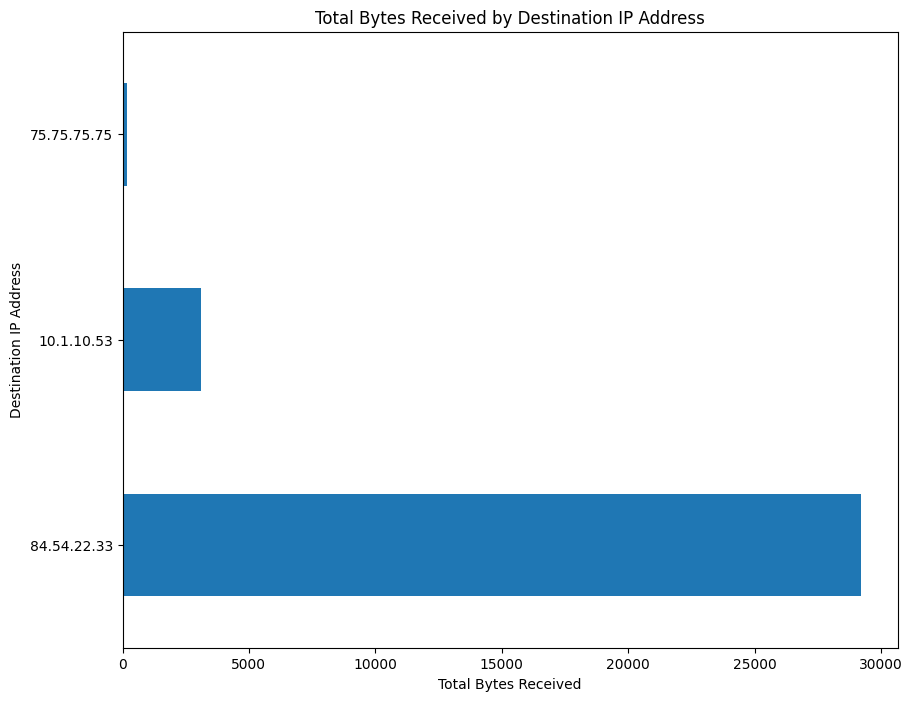

In [16]:
# b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X la suma de los payloads (bytes) recibidos en dichas direcciones.
df_paquetes.groupby('dst_ip')['size'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.xlabel('Total Bytes Received')
plt.ylabel('Destination IP Address')
plt.title('Total Bytes Received by Destination IP Address')
plt.show()

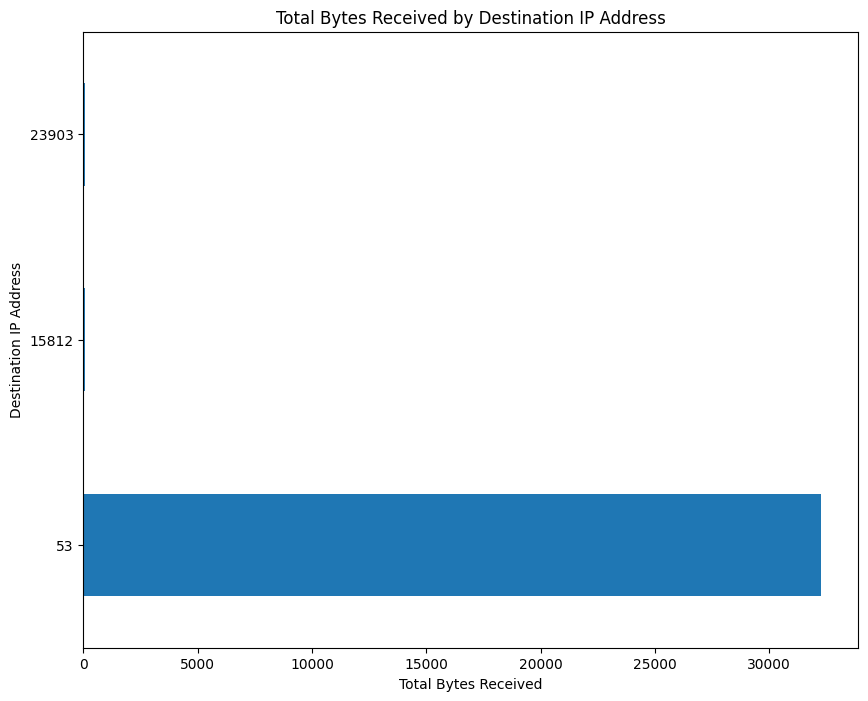

In [17]:
# c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el eje X la suma de los payloads (bytes) enviados de dichos puertos.
df_paquetes.groupby('src_port')['size'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.xlabel('Total Bytes Received')
plt.ylabel('Destination IP Address')
plt.title('Total Bytes Received by Destination IP Address')
plt.show()

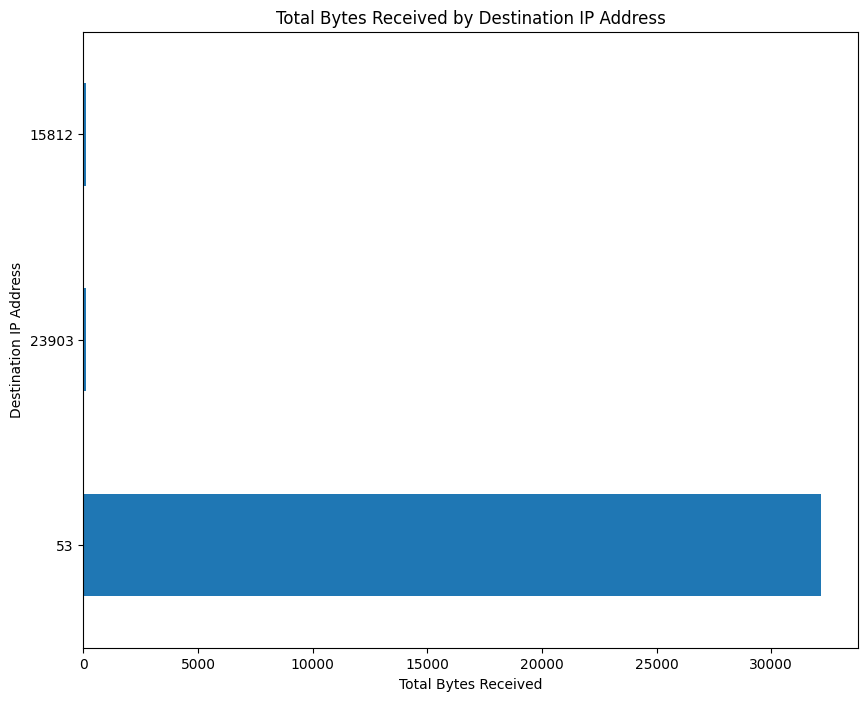

In [18]:
# d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el eje X la suma de los payloads (bytes) recibidos en dichos puertos.
df_paquetes.groupby('dst_port')['size'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.xlabel('Total Bytes Received')
plt.ylabel('Destination IP Address')
plt.title('Total Bytes Received by Destination IP Address')
plt.show()

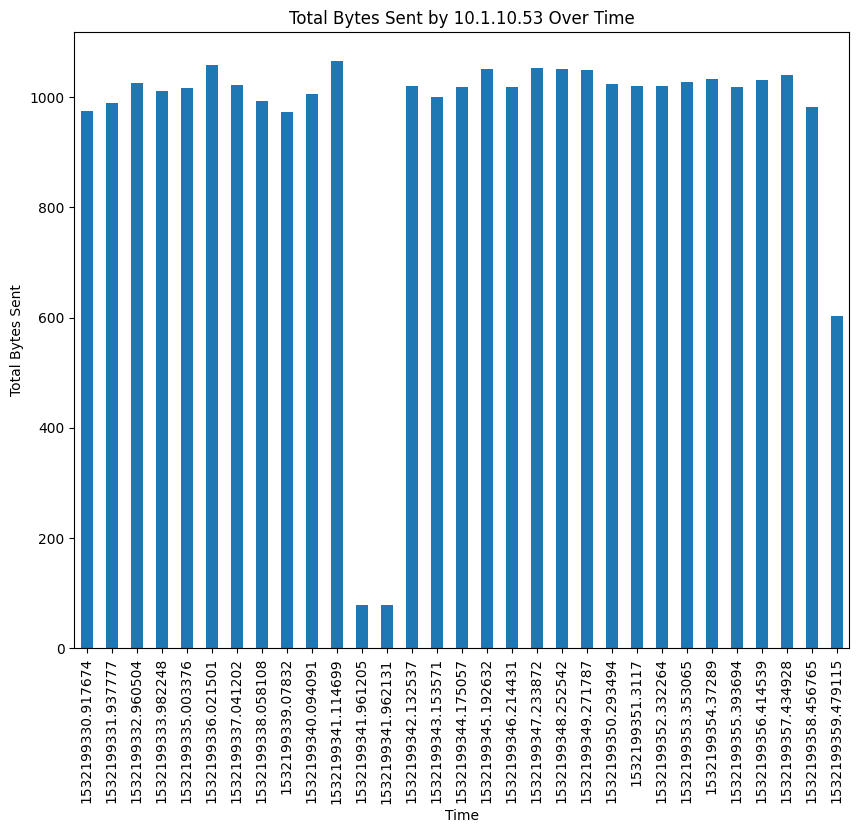

In [19]:
# Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el eje X el tiempo, para la IP origen más frecuente.
df_paquetes[df_paquetes['src_ip'] == most_origin_ip].groupby('time')['size'].sum().plot(kind='bar', figsize=(10, 8))
plt.xlabel('Time')
plt.ylabel('Total Bytes Sent')
plt.title(f'Total Bytes Sent by {most_origin_ip} Over Time')
plt.show()

f. Utilizando la información de las estadísticas y la información del comportamiento del
tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común
el comportamiento?



In [20]:
# Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen más frecuente.
df_paquetes_origin = df_paquetes[df_paquetes['src_ip'] == most_origin_ip]
df_paquetes_origin

,packet_id,time,size,summary,src_ip,dst_ip,proto,src_port,dst_port,transport,payload
0,0,1.532199e+09,975,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\...
2,2,1.532199e+09,989,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b':\xef\xbf\xbdle:\xc7\xa9\xef\xbf\xbd\xef\xbf...
4,4,1.532199e+09,1026,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbd\xef\xbf\xbd^n\xef\xbf\xbd\'\'\x...
6,6,1.532199e+09,1012,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xe4\x8e\x91Bj_\xef\xbf\xbda\r\xef\xbf\xbd\x...
8,8,1.532199e+09,1017,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xcb\xb4...
10,10,1.532199e+09,1059,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'w\xef\xbf\xbd \xef\xbf\xbd\x02R\xef\xbf\xbd\...
12,12,1.532199e+09,1022,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'VQ\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\x...
14,14,1.532199e+09,993,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\x18\xef\xbf\xbdGp\xef\xbf\xbd\xef\xbf\xbd\x...
16,16,1.532199e+09,973,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbd\xef\xbf\xbd\x1e\x00\xce\x9ar\xe...
18,18,1.532199e+09,1006,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'B\xef\xbf\xbd0\x0c\xef\xbf\xbdB\xef\xbf\xbd0...


In [21]:
# Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y agrúpelas por dst y la suma del payload.
df_reduced = pd.DataFrame()

df_reduced['src'] = df_paquetes_origin['src_ip']
df_reduced['dst'] = df_paquetes_origin['dst_ip']
df_reduced['size'] = df_paquetes_origin['size']
df_reduced['payload'] = df_paquetes_origin['payload']

df_reduced = df_reduced.groupby(['dst'])['size'].sum().reset_index()

df_reduced

,dst,size
0,75.75.75.75,158
1,84.54.22.33,29197


In [22]:
# Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.
most_frequent_dst_ip = df_reduced.loc[df_reduced['size'].idxmax()]['dst']
most_frequent_dst_ip

'84.54.22.33'

In [23]:
# Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.
df_suspicious = df_paquetes[
    # Communication from most_origin_ip to most_frequent_dst_ip
    ((df_paquetes['src_ip'] == most_origin_ip) & (df_paquetes['dst_ip'] == most_frequent_dst_ip)) |
    # OR communication from most_frequent_dst_ip to most_origin_ip (the reverse direction)
    ((df_paquetes['src_ip'] == most_frequent_dst_ip) & (df_paquetes['dst_ip'] == most_origin_ip))
]
df_suspicious

,packet_id,time,size,summary,src_ip,dst_ip,proto,src_port,dst_port,transport,payload
0,0,1.532199e+09,975,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\...
1,1,1.532199e+09,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,84.54.22.33,10.1.10.53,17,53,53,UDP,NaN
2,2,1.532199e+09,989,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b':\xef\xbf\xbdle:\xc7\xa9\xef\xbf\xbd\xef\xbf...
3,3,1.532199e+09,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,84.54.22.33,10.1.10.53,17,53,53,UDP,NaN
4,4,1.532199e+09,1026,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbd\xef\xbf\xbd^n\xef\xbf\xbd\'\'\x...
5,5,1.532199e+09,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,84.54.22.33,10.1.10.53,17,53,53,UDP,NaN
6,6,1.532199e+09,1012,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xe4\x8e\x91Bj_\xef\xbf\xbda\r\xef\xbf\xbd\x...
7,7,1.532199e+09,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,84.54.22.33,10.1.10.53,17,53,53,UDP,NaN
8,8,1.532199e+09,1017,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,10.1.10.53,84.54.22.33,17,53,53,UDP,b'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xcb\xb4...
9,9,1.532199e+09,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,84.54.22.33,10.1.10.53,17,53,53,UDP,NaN


In [29]:
# Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.
payloads = []
for i in range(len(df_suspicious)):
    payload = df_suspicious.iloc[i]['payload']
    if pd.notna(payload):
        payloads.append(payload)
payloads

[b'\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01b\x00\x00\x00\xef\xbf\xbd\x08\x06\x00\x00\x00(\xef\xbf\xbdTR\x00\x00:\xef\xbf\xbdIDATx\xef\xbf\xbd\xef\xbf\xbd\t|T\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd;K\x12\x08;\x08\xef\xbf\xbd\nE\xef\xbf\xbd\xef\xbf\xbd$\x19\xef\xbf\xbd\xef\xbf\xbdZi\xdf\xaa-\xef\xbf\xbd;N2\xef\xbf\xbd\xef\xbf\xbdV\xef\xbf\xbdV\xef\xbf\xbda\xef\xbf\xbdZ\x11!\xef\xbf\xbd\xef\xbf\xbd\x01\xdc\xbbik[\xef\xbf\xbd.ok\xef\xbf\xbde\xef\xbf\xbd\x01\\\xef\xbf\xbd\xef\xbf\xbd]\xef\xbf\xbd-\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdd\xef\xbf\xbd\x08\xef\xbf\xbd\x08\xef\xbf\xbd\xef\xbf\xbdg\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd<\xef\xbf\xbd\xef\xbf\xbdL\x12\xef\xbf\xbd$3wf\xef\xbf\xbd\xef\xbf\xbd\x02<_\r\xef\xbf\xbdY\xef\xbf\xbdr\xef\xbf\xbd\xef\xbf\xbdy\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x1c\r\x18\xef\xbf\xbd8c\xef\xbf\xbdew\r\x1e\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x13\xef\xbf\xbdiaK\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdu}\xc5\xb2w\x

In [25]:
# Observe los primeros bytes del contenido, ¿encuentra algún tipo de dato que no haga sentido que se envíe al puerto destino? Describa lo que encontró.
